In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the breast cancer dataset from scikit-learn.

In [2]:
from sklearn.datasets import load_breast_cancer

In [17]:
cancer = load_breast_cancer()

In [19]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [20]:
data = cancer['data']
target = cancer['target']
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Check the labels.

In [21]:
np.unique(target)

array([0, 1])

Convert the dataset into a dataframe.

In [31]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<AxesSubplot:>

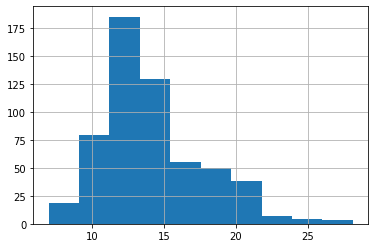

In [32]:
df['mean radius'].hist()

Build a linear plot for the mean smoothness and mean compactness.

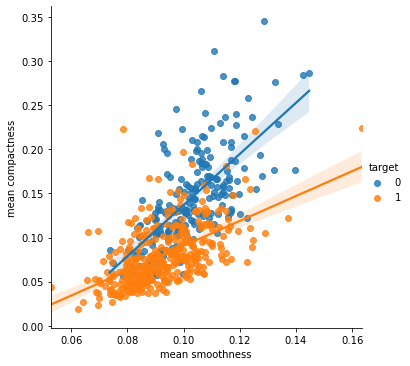

In [33]:
sns.lmplot(data=df, x='mean smoothness', y='mean compactness', hue='target');

We observe that the benign tumors are majorly clustered for mean compactness score less than 0.18, and it wouldn't be an overstretch to say that the tumors with mean compactness greater than 0.20 have a very high change to be malignant tumors. Meanwhile, mean smoothness by itself isn't a great indicator of tumor classes.

# Build the Model

In [37]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
from sklearn.svm import SVC

svm = SVC()

In [39]:
svm.fit(X_train, y_train)

SVC()

In [41]:
predictions = svm.predict(X_test)

In [42]:
np.mean(predictions != y_test)

0.10526315789473684

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print('\n')

[[29 11]
 [ 1 73]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83        40
           1       0.87      0.99      0.92        74

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.89       114





In [49]:
len(y_test[y_test == 0])

40

Rebuild the model with GridSearch

In [51]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {'C': [10**(i) for i in range(-1, 4)], 'gamma': [10**(i) for i in range(2, -4, -1)]}

In [80]:
grid = GridSearchCV(SVC(), param_grid, verbose=10)

In [81]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START C=0.1, gamma=100...........................................
[CV 1/5; 1/30] END ............C=0.1, gamma=100;, score=0.615 total time=   0.0s
[CV 2/5; 1/30] START C=0.1, gamma=100...........................................
[CV 2/5; 1/30] END ............C=0.1, gamma=100;, score=0.615 total time=   0.0s
[CV 3/5; 1/30] START C=0.1, gamma=100...........................................
[CV 3/5; 1/30] END ............C=0.1, gamma=100;, score=0.626 total time=   0.0s
[CV 4/5; 1/30] START C=0.1, gamma=100...........................................
[CV 4/5; 1/30] END ............C=0.1, gamma=100;, score=0.626 total time=   0.0s
[CV 5/5; 1/30] START C=0.1, gamma=100...........................................
[CV 5/5; 1/30] END ............C=0.1, gamma=100;, score=0.626 total time=   0.0s
[CV 1/5; 2/30] START C=0.1, gamma=10............................................
[CV 1/5; 2/30] END .............C=0.1, gamma=10

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001]},
             verbose=10)

Return the best parameters for SVC.

In [82]:
grid.best_params_

{'C': 1, 'gamma': 0.001}

In [83]:
pred = grid.predict(X_test)

In [84]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.93      0.95      0.94        74

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



And, we got better results. Take note that recall value for 0 (malignant tumors) has increased from 0.72 to 0.88, which is one of our primary concerns in this model.

# SVM for Iris Dataset

In [86]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


How many different species do we have in the dataset?

In [87]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

How are the species distributed?

<AxesSubplot:>

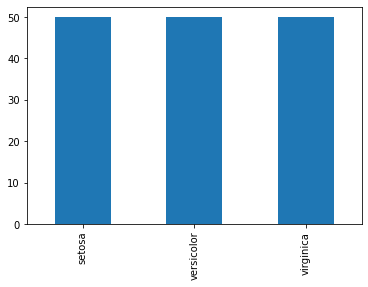

In [92]:
df.species.value_counts().plot(kind='bar')

Check for null values.

In [94]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Plot the linear plot of sepal and petal length of each species, colored by their species class.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


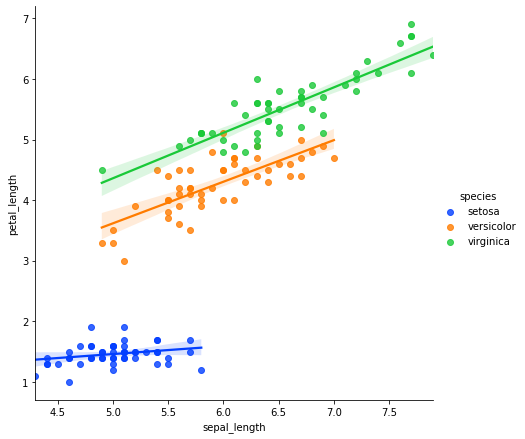

In [108]:
sns.lmplot(data=df, x='sepal_length', y='petal_length', hue='species', palette='bright', size=6, height=5)

The species can be clearly distinguished by the combination of their sepal length and petal length, and Virginica is the species whose sepal length and petal length are correlated most. <br>
Now show the same relation for sepal and petal width.

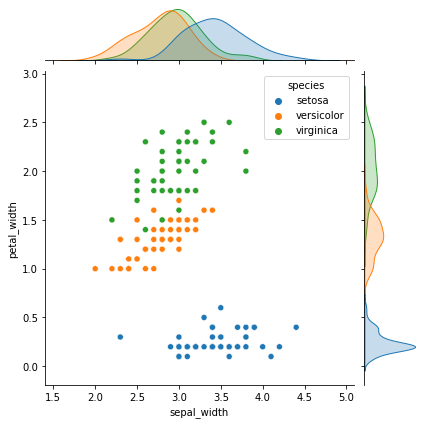

In [109]:
sns.jointplot(data=df, x='sepal_width', y='petal_width', hue='species')

Create a kde plot of sepal length and width of virginica species of flower.

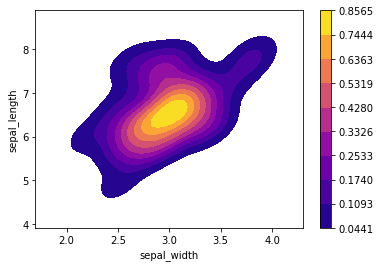

In [135]:
virginica = df[df.species == 'virginica']
sns.kdeplot(data=virginica, x='sepal_width', y='sepal_length', cmap='plasma', shade=True, cbar=True);

In [111]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
svm = SVC()

In [113]:
svm.fit(X_train, y_train)

SVC()

In [114]:
pred = svm.predict(X_test)

In [115]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



SVM has alread done very well without GridSearch but let's assemble the model again with GridSearch.

In [123]:
param_grid = {'C': [(10)**i for i in range(-5, 5)], 'gamma': [(10)**i for i in range(-7, 3)]}

grid = GridSearchCV(SVC(), param_grid, verbose=3)

In [124]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ..............C=1e-05, gamma=1e-07;, score=0.333 total time=   0.0s
[CV 2/5] END ..............C=1e-05, gamma=1e-07;, score=0.333 total time=   0.0s
[CV 3/5] END ..............C=1e-05, gamma=1e-07;, score=0.333 total time=   0.0s
[CV 4/5] END ..............C=1e-05, gamma=1e-07;, score=0.375 total time=   0.0s
[CV 5/5] END ..............C=1e-05, gamma=1e-07;, score=0.375 total time=   0.0s
[CV 1/5] END ..............C=1e-05, gamma=1e-06;, score=0.333 total time=   0.0s
[CV 2/5] END ..............C=1e-05, gamma=1e-06;, score=0.333 total time=   0.0s
[CV 3/5] END ..............C=1e-05, gamma=1e-06;, score=0.333 total time=   0.0s
[CV 4/5] END ..............C=1e-05, gamma=1e-06;, score=0.375 total time=   0.0s
[CV 5/5] END ..............C=1e-05, gamma=1e-06;, score=0.375 total time=   0.0s
[CV 1/5] END ..............C=1e-05, gamma=1e-05;, score=0.333 total time=   0.0s
[CV 2/5] END ..............C=1e-05, gamma=1e-0

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'gamma': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 10, 100]},
             verbose=3)

In [125]:
grid.best_params_

{'C': 1, 'gamma': 1}

The Grid Search gave the default C and gamma values as best parameters, so the we will get the same confusion matrix and classification report after grid.

In [126]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [127]:
pred = grid.predict(X_test)

In [128]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[12  0  0]
 [ 0  8  0]
 [ 0  1  9]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

